In [1]:
import noisereduce as nr
import librosa 
import librosa.display
import soundfile
kayit = librosa.load("C:\\Users\\adam\\Desktop\\2022Sep25-12.24.13.wav")
ornek = librosa.load("C:\\Users\\adam\\Desktop\\cry_detection\\datasets\data\\301 - Crying baby\\2-66637-A.ogg")
kayit2 = soundfile.read("C:\\Users\\adam\\Desktop\\2022Sep25-12.24.13.wav", dtype='float32')
kayit3 = soundfile.read("C:\\Users\\adam\\Desktop\\buses.wav", dtype='float32')

In [2]:
import torch
sig1 = torch.from_numpy(kayit[0])
sig1 = torch.unsqueeze(sig1, dim=0)
sig2 = nr.reduce_noise(y=sig1[0], sr=kayit[1], prop_decrease=.90)


sig3 = nr.reduce_noise(y=kayit2[0], sr=kayit2[1])
sig4 = nr.reduce_noise(y=kayit2[0].transpose(), sr=kayit2[1])


sig5 = nr.reduce_noise(y=kayit3[0], sr=kayit3[1], prop_decrease=0.95)



In [11]:
import torchaudio.transforms as transforms
a = transforms.MelSpectrogram()(sig1)
b = transforms.AmplitudeToDB()(a)
print(b.shape)

torch.Size([1, 128, 552])


c:\Users\adam\AppData\Local\Programs\Python\Python310\lib\site-packages\torchaudio\functional\functional.py:539: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


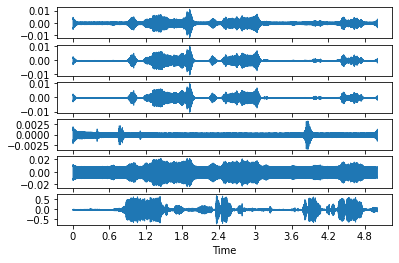

In [52]:
import matplotlib.pyplot as plt

plt.subplot(6,1,1)
librosa.display.waveshow(sig2, sr=kayit[1])

plt.subplot(6,1,2)
librosa.display.waveshow(sig3, sr= kayit2[1])

plt.subplot(6,1,3)
librosa.display.waveshow(sig4, sr= kayit2[1])

plt.subplot(6,1,4)
librosa.display.waveshow(sig5, sr= kayit3[1])

plt.subplot(6,1,5)
librosa.display.waveshow(kayit[0], sr=kayit[1])

plt.subplot(6,1,6)
librosa.display.waveshow(ornek[0], sr= ornek[1])

In [54]:
from IPython.display import Audio

Audio(data=sig2, rate=kayit[1])


In [45]:
Audio(data=sig5, rate=kayit3[1])

In [23]:
Audio(data=ornek[0], rate=ornek[1])